In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [87]:
df_en = pd.read_json("json/test/dataset_en_test.json", orient="records", lines=True)
df_en = df_en.loc[df_en['stars']!=3]
df_en["sentiment"] = df_en["stars"].apply(lambda x: 0 if x < 3 else 1)
df_en = df_en[['review_body','sentiment']]
df_en["review_body"] = df_en["review_body"].apply(lambda x: x if isinstance(x,str) else " ")
df_en=df_en.reset_index(drop=True)

In [7]:
wrong_ids=np.loadtxt('wrong_ids.txt',delimiter=',')
y_true=np.loadtxt('y_true.txt',delimiter=',')
y_pred=np.loadtxt('y_pred.txt',delimiter=',')

In [76]:
len(wrong_ids)

231

In [20]:
conf

array([[1895,  105],
       [ 126, 1874]])

In [81]:
count=0
for i,j in zip(y_true,y_pred):
    if i==0 and i!=j:
        count+=1
print(count)

105


In [60]:
conf=confusion_matrix(y_true,y_pred)
newvals=[]
for i in range(len(conf)):
    for j in range(len(conf)):
        new=conf[i,j]
        new=new/4000
        newvals.append(new)
newvals=[i*100 for i in newvals]
conf=np.reshape(newvals,(2,2))


Text(0.5, 1.0, 'Fine-tuned german model predicting English')

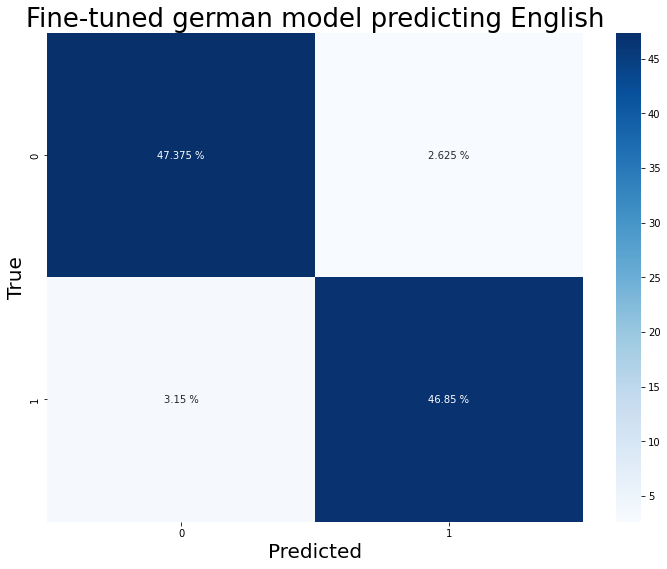

In [70]:
plt.figure(figsize = (12,9))
ax=sn.heatmap(conf,annot=True,fmt='g',cmap='Blues')
for t in ax.texts: 
    t.set_text(t.get_text() + " %")
ax.set_xlabel('Predicted',fontsize=20)
ax.set_ylabel('True',fontsize=20)
ax.set_title('Fine-tuned german model predicting English',size=26)

In [84]:
for i in wrong_ids:
    print(df_en['review_body'][i],'\n','true: ', y_true[i],' predicted: ',y_pred[i],'\n')

Added so much to the projects! Works well. 
 true:  0.0  predicted:  1.0 

I have been using this for several years and recently bought several only to find out that they all have perfume in them now. 
 true:  0.0  predicted:  1.0 

have not used it yet 
 true:  0.0  predicted:  1.0 

Doesn't distribute the steam strong enough small fan but it is quiet but who cares 
 true:  0.0  predicted:  1.0 

Use at your own risk. My wife and I both had burning sensation and skin reactions. No history of sensitive skin. 
 true:  0.0  predicted:  1.0 

I love it It is adorable , perfect size! But my glass part has a crack, can you please replace the glass part? Thank you 
 true:  0.0  predicted:  1.0 

Better off buying the kits 
 true:  0.0  predicted:  1.0 

haven't used it yet i got it for my son to use 
 true:  0.0  predicted:  1.0 

I was impressed by the speed with which it arrived. thank you. 
 true:  0.0  predicted:  1.0 

Fantastic belt ,love it . This is my second one , the first one was 

In [88]:
df_en

,review_body,sentiment
0,"These are AWFUL. They are see through, the fab...",0
1,I bought 4 and NONE of them worked. Yes I used...,0
2,On first use it didn't heat up and now it does...,0
3,You want an HONEST answer? I just returned fro...,0
4,The glue works fine but the container is impos...,0
...,...,...
3995,"It's still early, but so far the scales seems ...",1
3996,I’ve used this face mask a few times now and i...,1
3997,Great price. Good quality.,1
3998,Fits my 2016 F150 XLT great. Now I dont have t...,1
